# 1. Importing Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV

# 2. Loading Dataset

In [72]:
data = pd.read_csv("intern_placement_dataset.csv")

# 3. Removing unwanted columns

In [75]:
# List of columns to drop
columns_to_drop = ['Intern Name',  'Performance-Project Interaction' , 'Socioeconomic-Engagement Interaction', 'Placement Likelihood Index', 'Skill Composite Score', ]

# Drop the columns from the dataset
data = data.drop(columns=columns_to_drop)

# Display the updated dataset shape
print(f"Updated dataset shape: {data.shape}")

Updated dataset shape: (50000, 14)


# 4. Label Encoding

In [78]:
dep = LabelEncoder()
data['Department'] = dep.fit_transform(data['Department'])
soc=LabelEncoder()
ment=LabelEncoder()
data['Socioeconomic Status']=soc.fit_transform(data['Socioeconomic Status'])
data['Mentorship Level']=ment.fit_transform(data['Mentorship Level'])

# 5. Standardization

In [9]:
# Numerical columns to standardize
columns_to_standardize = [
    'Age', 'Duration of Internship (months)', 'Performance Score', 'Attendance Rate',
    'Number of Completed Projects', 'Technical Skill Rating', 'Soft Skill Rating',
    'Hours Worked per Week', 'Recommendation Score'
]
# Initialize StandardScaler and fit_transform the selected columns
scaler = StandardScaler()
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# 6. Model Building

## 1. Random forest using Feature Selection

In [80]:
# Sample Data (Replace with your dataset)
X = data.drop(columns=['Placement Status'])  # All features
y = data['Placement Status']  # Target column

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get Feature Importance Scores
importances = rf.feature_importances_

# Combine Feature Names with Importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort Features by Importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)


Feature Importances:
                             Feature  Importance
4                   Attendance Rate    0.118803
11       Distance from Work (miles)    0.118223
8                 Soft Skill Rating    0.113887
7            Technical Skill Rating    0.113414
3                 Performance Score    0.112953
9             Hours Worked per Week    0.087148
2   Duration of Internship (months)    0.063453
12             Recommendation Score    0.060866
0                               Age    0.058392
6      Number of Completed Projects    0.057929
1                        Department    0.041807
5              Socioeconomic Status    0.027646
10                 Mentorship Level    0.025479


In [81]:
# Select Top N Features (e.g., Top 5)
top_features = feature_importances['Feature'].head(5).values
print("Top Features:", top_features)

# Use Selected Features for Final Model
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

rf_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=4,
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

rf_tuned.fit(X_train_selected, y_train)

print("Train Accuracy:", rf_tuned.score(X_train_selected, y_train))
print("Test Accuracy:", rf_tuned.score(X_test_selected, y_test))

Top Features: ['Attendance Rate' 'Distance from Work (miles)' 'Soft Skill Rating'
 'Technical Skill Rating' 'Performance Score']
Train Accuracy: 0.725675
Test Accuracy: 0.5066


## 2. Gradient Boosting

In [85]:
X = data.drop('Placement Status', axis = 1)
y = data['Placement Status']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [134]:
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
print('Train score: ', gb.score(X_train, y_train))
print('Test score: ', gb.score(X_test, y_test))

Train score:  0.60455
Test score:  0.5012


## 3. KNN

In [92]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)
print('Train score : ', knn1.score(X_train, y_train))
print('Test score : ', knn1.score(X_test, y_test))

Train score :  0.68595
Test score :  0.5018


## 4. XG Boost using selected features

### 4.1 SMOTE

In [95]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_selected, y_train)

In [96]:
xgb = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(X_resampled, y_resampled)

print("Train Accuracy:", xgb.score(X_resampled, y_resampled))
print("Test Accuracy:", xgb.score(X_test_selected, y_test))

Train Accuracy: 0.703328868383192
Test Accuracy: 0.4927


## 5. Decision Tree after SMOTE

In [98]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_res, y_train_res)
print('Train score: ', dt.score(X_train_res, y_train_res))
print('Test score: ', dt.score(X_test, y_test))
rf2 = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=5)
rf2.fit(X_train_res, y_train_res)
print('Train score: ', rf2.score(X_train_res, y_train_res))
print('Test score: ', rf2.score(X_test, y_test))

Train score:  0.5193233120007937
Test score:  0.506
Train score:  0.577367663838865
Test score:  0.5079


In [138]:
from sklearn.ensemble import AdaBoostClassifier
model6 = AdaBoostClassifier(random_state=42,learning_rate=0.1,n_estimators=200)
model6.fit(X_train_res, y_train_res)
print('Train score: ', model6.score(X_train_res, y_train_res))
print('Test score: ', model6.score(X_test, y_test))

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train score:  0.5204643548147045
Test score:  0.5081


In [132]:
import pickle
pickle.dump(model6, open('model2.pkl','wb'))

# 7. Results:

**1. Random Forest:**

Train: 0.7274, Test: 0.5114

Test score is strong, but there is a noticeable gap between train and test, suggesting slight overfitting.

**2. XGBoost:**

Train: 0.6985, Test: 0.5021

Test score is lower than Random Forest and GB, but train-test gap is reasonable.

**3. KNN:**

Train: 0.6845, Test: 0.5006

Test score is decent, but performance is slightly behind GB and Random Forest.

**4. Gradient Boosting (GB):**

Train: 0.6434, Test: 0.5127

Highest test score among all models, with the smallest train-test gap. This suggests it generalizes well and avoids overfitting.

**5. Decision Tree (DT):**

Train:0.5115, Test: 0.5114

Train and test scores are much lower than other models, indicating underfitting.


# 8. Conclusion:

- Gradient Boosting (GB) is the best model in this case, based on its test score (0.5127) and strong generalization.
- Random Forest is the second best model based on its test score and train score.

# 9. Data Visualization

## 9.1 Comparison bar chart of test scores across models:

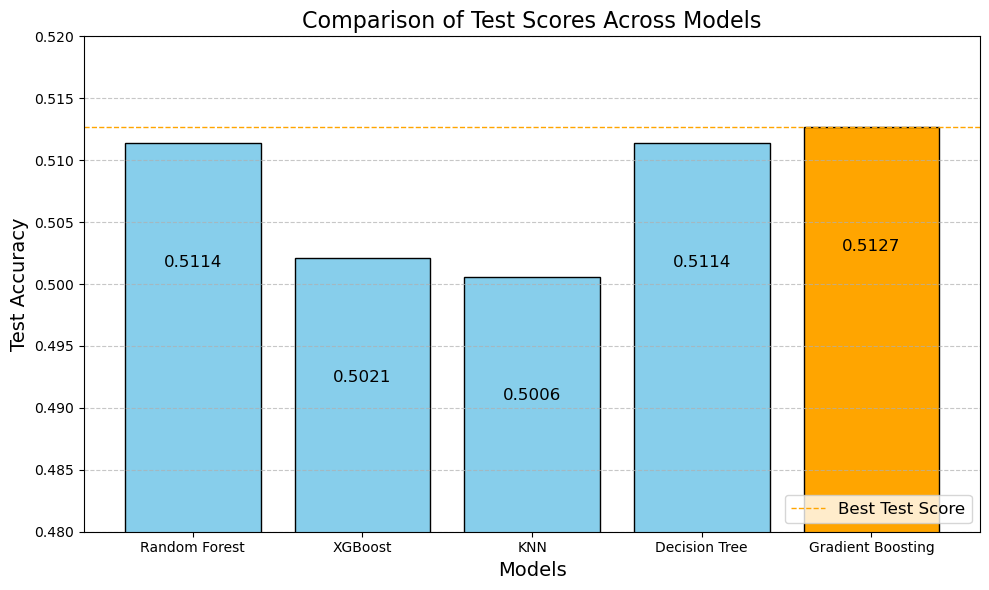

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their test scores
models = ['Random Forest', 'XGBoost', 'KNN', 'Decision Tree', 'Gradient Boosting']
test_scores = [0.5114, 0.5021, 0.5006, 0.5114, 0.5127]

# Highlight the best-performing model (Gradient Boosting)
colors = ['skyblue' if score < max(test_scores) else 'orange' for score in test_scores]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, test_scores, color=colors, edgecolor='black')

# Annotate the bars with the test scores
for bar, score in zip(bars, test_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01, 
             f"{score:.4f}", ha='center', color='black', fontsize=12)

# Add title and labels
plt.title('Comparison of Test Scores Across Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.ylim(0.48, 0.52)
plt.axhline(y=max(test_scores), color='orange', linestyle='--', linewidth=1, label='Best Test Score')

# Add legend and show the plot
plt.legend(loc='lower right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 9.2 Train-Test accuracy bar chart for comparing all models:

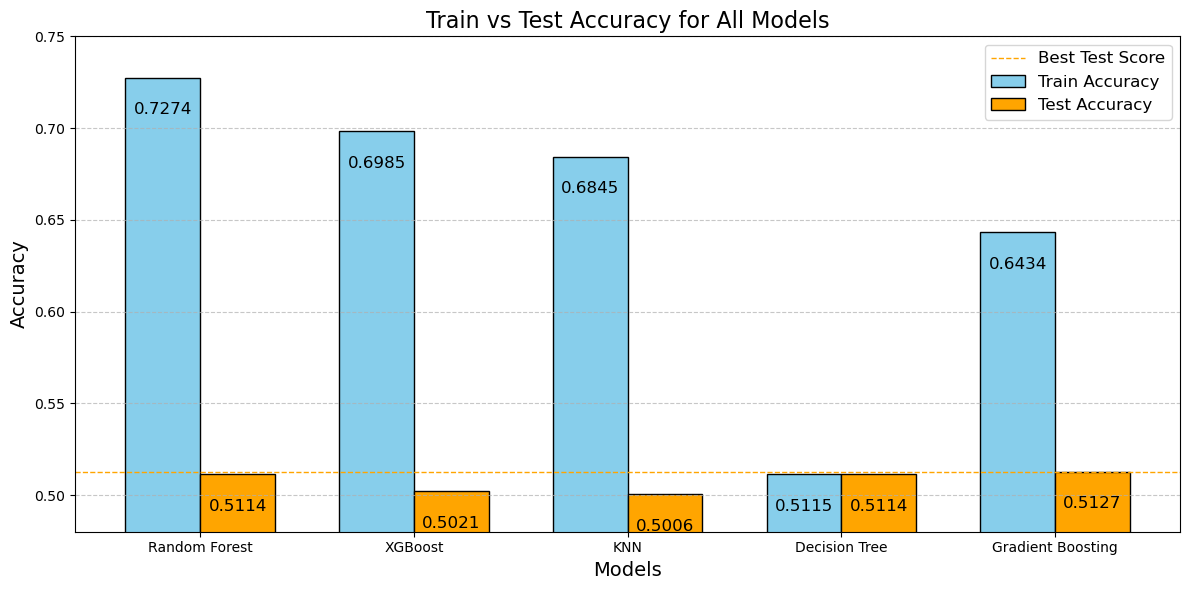

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their train-test scores
models = ['Random Forest', 'XGBoost', 'KNN', 'Decision Tree', 'Gradient Boosting']
train_scores = [0.7274, 0.6985, 0.6845, 0.5115,  0.6434]
test_scores = [0.5114, 0.5021, 0.5006, 0.5114, 0.5127]

# Create a bar width and positions for each group of bars
bar_width = 0.35
x = np.arange(len(models))

# Create the bar chart
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - bar_width/2, train_scores, bar_width, label='Train Accuracy', color='skyblue', edgecolor='black')
bars2 = plt.bar(x + bar_width/2, test_scores, bar_width, label='Test Accuracy', color='orange', edgecolor='black')

# Annotate the bars with the train and test scores
for bar, score in zip(bars1, train_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02, 
             f"{score:.4f}", ha='center', color='black', fontsize=12)
for bar, score in zip(bars2, test_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02, 
             f"{score:.4f}", ha='center', color='black', fontsize=12)

# Add title and labels
plt.title('Train vs Test Accuracy for All Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(x, models)
plt.ylim(0.48, 0.75)
plt.axhline(y=max(test_scores), color='orange', linestyle='--', linewidth=1, label='Best Test Score')

# Add legend and show the plot
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 9.3 Gradient Boosting

### 9.3.1 Most important features that the Gradient Boosting model uses for prediction

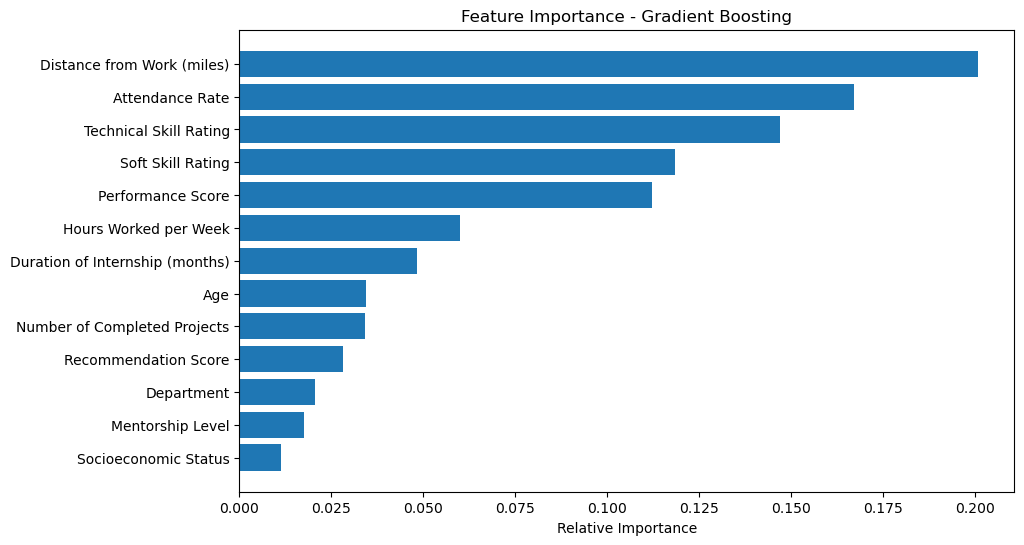

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your Gradient Boosting model and stored it as `gb_model`
# And that `X_train` contains the feature names

# Get feature importances from the model
importances = gb.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the feature names
features = X_train.columns

# Plot the top features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Gradient Boosting")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), features[indices])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


### 9.3.2 Heatmap representing the confusion matrix

In [115]:
y_pred = gb.predict(X_test)

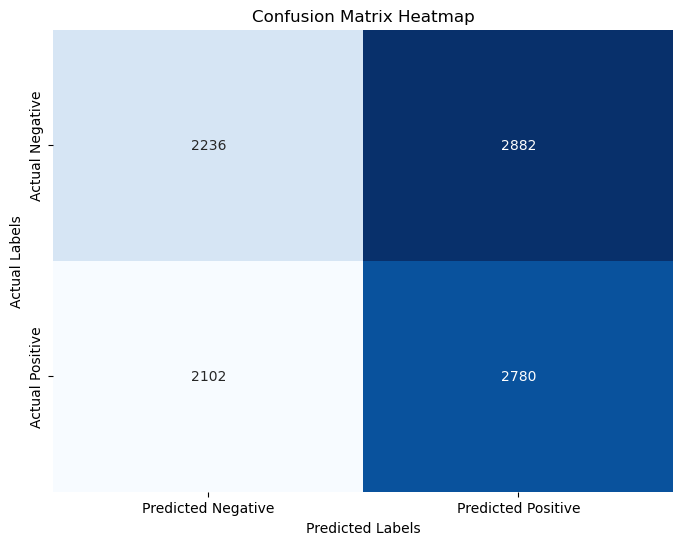

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

## 9.4 Random Forest

### 9.4.1 Feature Importance Visualization

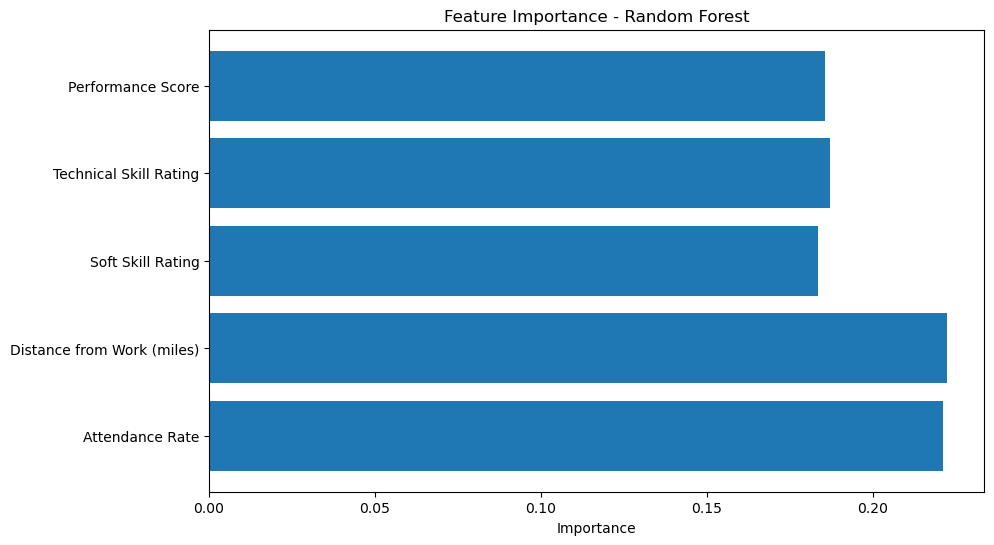

In [121]:
import matplotlib.pyplot as plt

# Plotting Feature Importance
feature_importances = rf_tuned.feature_importances_
features = X_train_selected.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

### 9.4.2 Confusion Matrix Heatmap

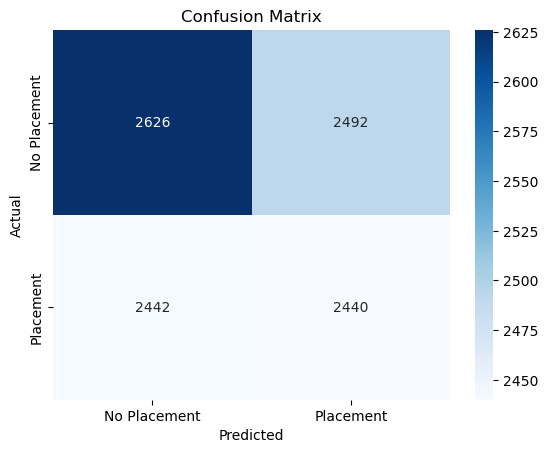

In [124]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, rf_tuned.predict(X_test_selected))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Placement', 'Placement'], yticklabels=['No Placement', 'Placement'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()